Calories Burnt estimation using physical characteristics and body vitals 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
calories= pd.read_csv('/content/drive/MyDrive/dataSet/CaloriesBurn/calories.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/drive/MyDrive/dataSet/CaloriesBurn/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


(exercise_data + calories)

In [ ]:
calories_data = pd.concat([exercise_data,calories['Calories']],axis = 1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
calories_data.shape

(15000, 9)

In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis 

In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualisation

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


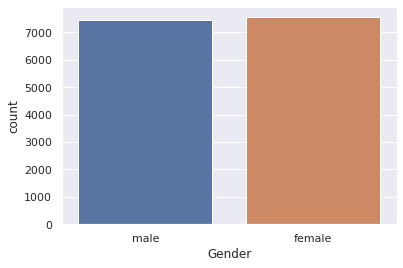

In [ ]:
sns.countplot(calories_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


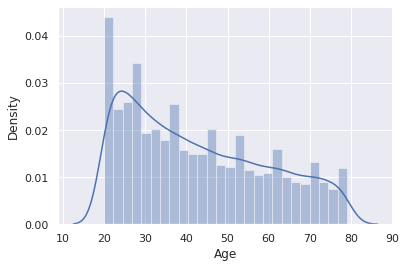

In [ ]:
#distribution of 'Age'
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


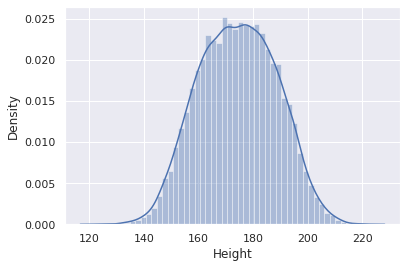

In [ ]:
sns.distplot(calories_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


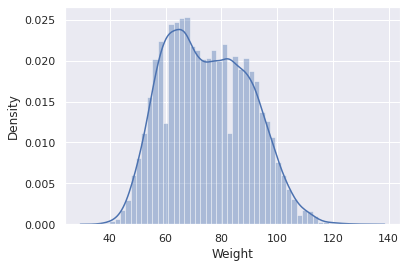

In [ ]:
sns.distplot(calories_data['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


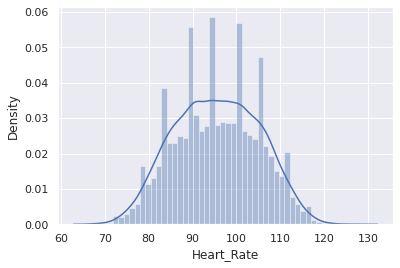

In [ ]:
sns.distplot(calories_data['Heart_Rate'])

Corelation between Duration of exercise and calories burn (positive co-relation)



In [ ]:
corelation= calories_data.corr()

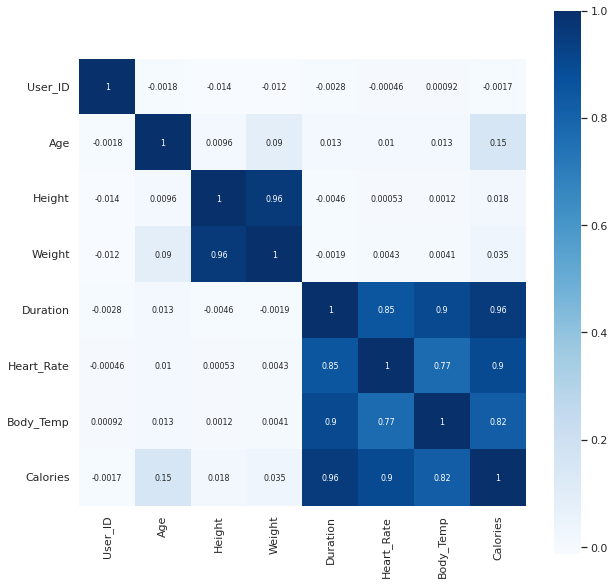

In [ ]:
#heatMap
plt.figure(figsize=(10,10))
sns.heatmap(corelation,cbar =True,square = True,annot =True,annot_kws ={'size':8},cmap='Blues')

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace =True)


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


seperating features and target

In [ ]:
X=calories_data.drop(columns =['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [ ]:
print(X)


       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
#Splitting
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [ ]:
model = LinearRegression()

In [ ]:
#training
model.fit(X_train,Y_train)

LinearRegression()

Evaluation



Prediction on test/training data

In [ ]:
test_data_prediction = model.predict(X_test)
train_data_prediction =model.predict(X_train)

In [ ]:
print(test_data_prediction)
print(train_data_prediction)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]
[  8.41660902  40.2186937   38.73162692 ... 111.62429435 179.27751451
  41.41833363]


--------- R^2 values ----

In [ ]:

r2_train = metrics.r2_score(Y_train,train_data_prediction)
print(r2_train)

0.9672762198112508


In [ ]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(r2_test)

0.9668790377181355


Mean Absolute Error

In [ ]:
mae= metrics.mean_absolute_error(Y_test,test_data_prediction)

In [ ]:
print("Mean Absolute error = " ,mae)

Mean Absolute error =  8.385188053147187


Estimation


In [ ]:
print(X_train)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1154        1   38   169.0    67.0       3.0        85.0       38.5
9804        0   30   194.0    96.0       9.0        91.0       39.6
7919        1   78   182.0    79.0       7.0        84.0       39.4
4854        0   50   171.0    77.0      29.0       111.0       40.8
5947        1   32   172.0    66.0      29.0       105.0       40.8
...       ...  ...     ...     ...       ...         ...        ...
11798       1   49   178.0    71.0      12.0        98.0       39.9
13896       1   67   159.0    58.0      23.0       101.0       40.4
6637        1   25   167.0    64.0      20.0       100.0       40.4
2575        1   36   167.0    64.0      28.0       108.0       40.8
7336        0   30   187.0    88.0      10.0        94.0       40.2

[12000 rows x 7 columns]


In [ ]:
#Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
input_data = (1,36,100.0,50.0,23.0,96.0,40.7)

In [ ]:

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = model.predict(input_data_reshaped)
print(prediction)
print('The calories burnt : ', prediction[0])

[132.55841965]
The calories burnt :  132.55841965374782


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
